In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 
import tabulate

In [2]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [3]:
#partition Data
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [4]:
maxDegree = 20
numModels = 10

bias2Arr = np.zeros(maxDegree)
varianceArr = np.zeros(maxDegree)
mseArr = np.zeros(maxDegree)

for deg in range(maxDegree): 
    # predMatrix => storing predicted values for each degree
    predMatrix = np.zeros((numModels,len(testData[:, 0])))
    for i in range(numModels): #should be 0, 10
        poly = PolynomialFeatures(degree = deg+1)
        # reshaping data
        X_train = poly.fit_transform(trainData[i][:, 0].reshape(-1, 1))
        y_train = trainData[i][:, 1].reshape(-1, 1)
        X_test = poly.fit_transform(testData[:, 0].reshape(-1, 1))
        y_test = testData[:, 1].reshape(-1, 1)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        predMatrix[i] = y_pred.reshape( len(y_pred))
        mseArr[deg] += np.mean(np.square(y_pred - y_test))

    mseArr[deg] /= numModels
    bias2Arr[deg] = np.mean( (np.mean(predMatrix, axis = 0) - testData[:, 1] ) ** 2 ) 
    varianceArr[deg] = np.mean(np.var(predMatrix, axis = 0))

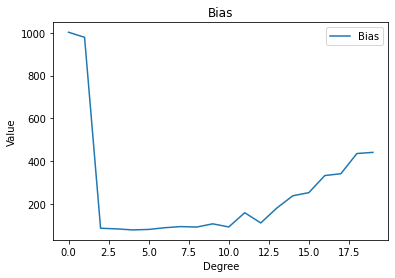

In [5]:
# plt.plot(varianceArr)
plt.plot(np.sqrt(bias2Arr), label = "Bias")
# plt.plot(mseArr)
plt.title('Bias')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

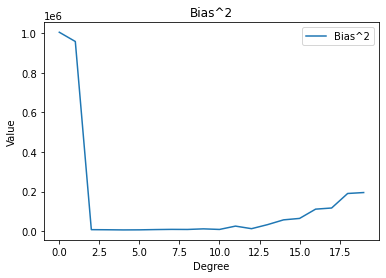

In [6]:
# plt.plot(varianceArr)
plt.plot(range(1, 21), bias2Arr, label = "Bias^2")
# plt.plot(mseArr)
plt.title('Bias^2')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

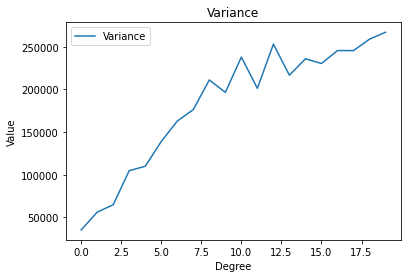

In [7]:
plt.plot(range(1, 21), varianceArr, label = "Variance")
plt.title('Variance')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

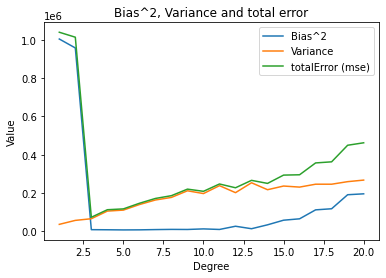

In [8]:
plt.plot( range(1, 21),bias2Arr, label = "Bias^2")
plt.plot(range(1, 21), varianceArr, label = "Variance")
plt.title('Bias^2, Variance and total error')
plt.plot(range(1, 21),mseArr, label='totalError (mse)')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()


In [9]:
# irreducible error

irredErrArr = mseArr - bias2Arr - varianceArr

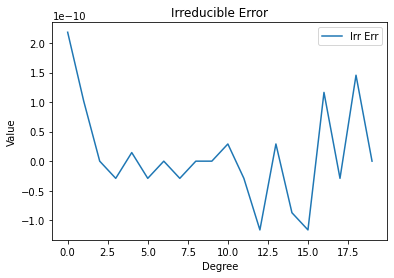

In [10]:

plt.plot(range(1, 21), irredErrArr, label = 'Irr Err')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.title('Irreducible Error')
# plt.plot(mseArr)
# plt.plot(varianceArr)
# plt.plot(bias2Arr)
plt.legend()
plt.show()

In [11]:
tableDF = pd.DataFrame({
    'degree': range(1, 21),
    'bias': np.sqrt(bias2Arr),
    'variance': varianceArr,
})

In [12]:
print(tableDF)

    degree         bias       variance
0        1  1002.541480   35409.852317
1        2   978.951461   56213.928933
2        3    87.688620   64904.845875
3        4    84.635950  104829.298443
4        5    79.817226  109980.343406
5        6    82.046105  138963.057975
6        7    89.967432  162903.459105
7        8    95.354401  176411.029217
8        9    93.180149  211082.130301
9       10   108.227376  196560.043925
10      11    93.675977  237897.907046
11      12   160.048996  201243.590639
12      13   112.359537  253050.469649
13      14   181.782901  216659.709366
14      15   239.165028  235927.457556
15      16   253.885359  230369.284840
16      17   333.625187  245513.133817
17      18   342.159768  245487.989451
18      19   436.397596  258862.516972
19      20   441.781382  266990.647522
